In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchdiffeq import odeint

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

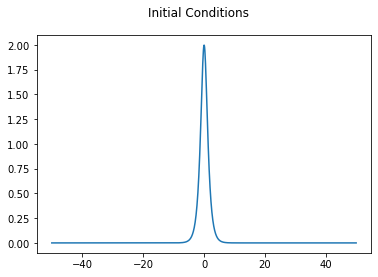

In [63]:
''' ==== u_t = u_xx ====
'''
L = 100  # [-5, 5]
N = 1000 + 1
dx = L / N
x = torch.arange(-L/2, L/2, dx)

# frequencies
kappa = 2 * torch.pi * torch.fft.fftfreq(N, dx)

# initial conditions
u0 = torch.complex(4 / (torch.exp(x) + torch.exp(-x)))

plt.plot(x.numpy(), u0.numpy())
plt.suptitle('Initial Conditions')
plt.show()

In [64]:
# simulation setup
dt = .1
T = 10
t = torch.arange(0,T,dt)

In [71]:
def rhs(t, uhat):
    return - torch.pow(kappa, 2) * uhat

u0hat = torch.fft.fft(u0)
uhat = odeint(rhs, u0hat, t, method='rk4')

u = torch.zeros_like(uhat)
u = u.type(torch.complex64)
for t_i in range(len(t)):
    u[t_i,:] = torch.fft.ifft(uhat[t_i,:])

u

TypeError: `y0` must be a floating point Tensor but is a torch.ComplexFloatTensor

In [56]:
u[2]

tensor([ 1.7573e+28-0.0000e+00j, -1.7169e+28-2.4131e+20j,
         1.6039e+28+1.3443e+20j,  ...,
        -1.4402e+28+3.5506e+20j,  1.6039e+28-1.3443e+20j,
        -1.7169e+28+2.4131e+20j])

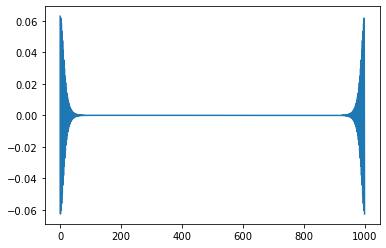

In [68]:
plt.plot(u[0].numpy().real)

In [8]:
a = np.array([2,2,2])

np.arange(a.shape[0])

array([0, 1, 2])